In [1]:
# %load ./include/header.py
import numpy as np
import matplotlib.pyplot as plt
import sys
from tqdm import trange,tqdm
sys.path.append('./include')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
np.set_printoptions(linewidth=120)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
from IPython.display import display

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [16]:
x = np.loadtxt('./data/Ising2D_config_L30.dat.gz')
y = np.loadtxt('./data/Ising2D_labels_L30.dat')
Tval = np.loadtxt('./data/Ising2D_temps_L30.dat')

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_test, x_validate, y_test, y_validate = train_test_split(x_test, y_test, test_size=0.5)

In [18]:
model = []
# 0
model.append(keras.Sequential(
[  
    layers.Dense(2,input_shape=(len(x_train[1]),),activation='relu'),
    layers.Dropout(.05),
    layers.Dense(2,activation='softmax')
]))
model[-1].summary()
model[-1].compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
y_train_hot = keras.utils.to_categorical(y_train, 2)
y_test_hot = keras.utils.to_categorical(y_test, 2)

y_validate_hot = keras.utils.to_categorical(y_validate, 2)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 2)                 1802      
_________________________________________________________________
dropout_10 (Dropout)         (None, 2)                 0         
_________________________________________________________________
dense_37 (Dense)             (None, 2)                 6         
Total params: 1,808
Trainable params: 1,808
Non-trainable params: 0
_________________________________________________________________


In [19]:
batch_size = 64
epochs = 20

training = []
training.append(model[-1].fit(x_train,y_train_hot, batch_size=batch_size, epochs=epochs,verbose=0, validation_data=(x_test,y_test_hot)))

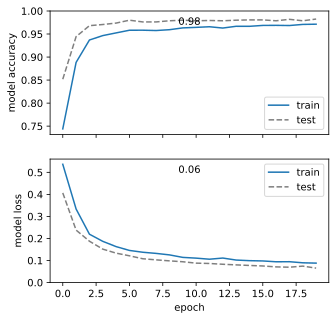

In [20]:
# look into training history
fig,ax = plt.subplots(2,1, sharex=True, figsize=(5,5))
score = []
score.append(model[-1].evaluate(x_validate, y_validate_hot, verbose=0))
# accuracy
ax[0].plot(training[-1].history['accuracy'], color=colors[0])
ax[0].plot(training[-1].history['val_accuracy'], ls='--', color=colors[-3])
ax[0].set_ylabel('model accuracy')
ax[0].legend(['train', 'test'], loc='best')
ax[0].text(0.5,0.95,f'{score[-1][1]:.2f}',horizontalalignment='center',verticalalignment='top', transform=ax[0].transAxes)
ax[0].set_ylim(top=1)

# loss
ax[1].plot(training[-1].history['loss'], color=colors[0])
ax[1].plot(training[-1].history['val_loss'], ls='--', color=colors[-3])
ax[1].set_ylabel('model loss')
ax[1].set_xlabel('epoch')
ax[1].set_ylim(bottom=0)
ax[1].text(0.5,0.95,f'{score[-1][0]:.2f}',horizontalalignment='center',verticalalignment='top', 
                         transform=ax[1].transAxes)
ax[1].legend(['train', 'test'], loc='best');

In [21]:
#1
model.append(keras.Sequential(
[  
    layers.Dense(2,input_shape=(len(x_train[1]),),activation='relu'),
    layers.Dense(2,activation='softmax')
]))
model[-1].compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
training.append(model[-1].fit(x_train,y_train_hot, batch_size=batch_size, epochs=epochs,verbose=0, validation_data=(x_test,y_test_hot)))
score.append(model[-1].evaluate(x_validate, y_validate_hot, verbose=0))

#2
model.append(keras.Sequential(
[  
    layers.Dense(10,input_shape=(len(x_train[1]),),activation='relu'),
    layers.Dense(10,input_shape=(len(x_train[1]),),activation='relu'),
    layers.Dense(2,activation='softmax')
]))
model[-1].compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
training.append(model[-1].fit(x_train,y_train_hot, batch_size=batch_size, epochs=epochs,verbose=0, validation_data=(x_test,y_test_hot)))
score.append(model[-1].evaluate(x_validate, y_validate_hot, verbose=0))

#3
model.append(keras.Sequential(
[  
    layers.Dense(10,input_shape=(len(x_train[1]),),activation='relu'),
    layers.Dropout(.2),
    layers.Dense(10,input_shape=(len(x_train[1]),),activation='relu'),
    layers.Dropout(.2),
    layers.Dense(2,activation='softmax')
]))
model[-1].compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
training.append(model[-1].fit(x_train,y_train_hot, batch_size=batch_size, epochs=epochs,verbose=0, validation_data=(x_test,y_test_hot)))
score.append(model[-1].evaluate(x_validate, y_validate_hot, verbose=0))

#4
model.append(keras.Sequential(
[  
    layers.Dense(20,input_shape=(len(x_train[1]),),activation='relu'),
    layers.Dense(30,input_shape=(len(x_train[1]),),activation='relu'),
    layers.Dense(2,activation='softmax')
]))
model[-1].compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
training.append(model[-1].fit(x_train,y_train_hot, batch_size=batch_size, epochs=epochs,verbose=0, validation_data=(x_test,y_test_hot)))
score.append(model[-1].evaluate(x_validate, y_validate_hot, verbose=0))

#5
model.append(keras.Sequential(
[  
    layers.Dense(20,input_shape=(len(x_train[1]),),activation='relu'),
    layers.Dropout(.2),
    layers.Dense(30,input_shape=(len(x_train[1]),),activation='relu'),
    layers.Dropout(.2),
    layers.Dense(2,activation='softmax')
]))
model[-1].compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
training.append(model[-1].fit(x_train,y_train_hot, batch_size=batch_size, epochs=epochs,verbose=0, validation_data=(x_test,y_test_hot)))
score.append(model[-1].evaluate(x_validate, y_validate_hot, verbose=0))

#6
model.append(keras.Sequential(
[  
    layers.Conv2D(3,5,input_shape=(30,30,1),activation='relu'),
    layers.MaxPooling2D(pool_size=(4, 4)),
    layers.Flatten(),
    layers.Dense(2,activation='softmax')
]))
model[-1].compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
training.append(model[-1].fit(x_train.reshape(12800,30,30,1),y_train_hot, batch_size=batch_size, epochs=epochs,verbose=0, validation_data=(x_test.reshape(1600,30,30,1),y_test_hot)))
score.append(model[-1].evaluate(x_validate.reshape(1600,30,30,1), y_validate_hot, verbose=0))

#7
model.append(keras.Sequential(
[  
    layers.Conv2D(5,5,input_shape=(30,30,1),activation='relu'),
    layers.MaxPooling2D(pool_size=(4, 4)),
    layers.Flatten(),
    layers.Dense(2,activation='softmax')
]))
model[-1].compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
training.append(model[-1].fit(x_train.reshape(12800,30,30,1),y_train_hot, batch_size=batch_size, epochs=epochs,verbose=0, validation_data=(x_test.reshape(1600,30,30,1),y_test_hot)))
score.append(model[-1].evaluate(x_validate.reshape(1600,30,30,1), y_validate_hot, verbose=0))

#8
model.append(keras.Sequential(
[  
    layers.Dense(2,input_shape=(len(x_train[1]),),activation='softmax')
]))
model[-1].compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
training.append(model[-1].fit(x_train,y_train_hot, batch_size=batch_size, epochs=epochs,verbose=0, validation_data=(x_test,y_test_hot)))
score.append(model[-1].evaluate(x_validate, y_validate_hot, verbose=0))

10 9 9


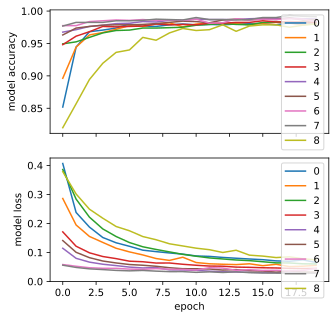

In [22]:
fig,ax = plt.subplots(2,1, sharex=True, figsize=(5,5))
# accuracy
for i in range(len(model)):
    ax[0].plot(training[i].history['val_accuracy'], color=colors[i])
ax[0].set_ylabel('model accuracy')
ax[0].legend(['0', '1', '2', '3', '4','5','6','7','8'], loc='best')

# loss
for i in range(len(model)):
    ax[1].plot(training[i].history['val_loss'], color=colors[i])
ax[1].set_ylabel('model loss')
ax[1].set_xlabel('epoch')
ax[1].set_ylim(bottom=0)
ax[1].legend(['0', '1', '2', '3', '4','5','6','7','8'], loc='best')


<h2>Key</h2>
0 - 1 layer 2 NN with dropout <br>
1 - 1 layer 2 NN without dropout <br>
2 - 2 Layer 10x10 NN without dropout <br>
3 - 2 Layer 10x10 NN with dropout <br>
4 - 2 Layer 20x30 NN without dropout <br>
5 - 2 Layer 20x30 NN with dropout <br>
6 - CNN 3 pixel <br>
7 - CNN 5 pixel <br>
8 - Shallow NN


In [23]:
best=np.where(score==np.amax(score))
print(f"Most accurate model is {best[0][0]}")

Most accurate model is 5


In [24]:
print(f"Model {best[0][0]} had an accuracy of {score[best[0][0]][1]}" )

Model 5 had an accuracy of 0.9912499785423279


In [25]:
modnum = best[0][0]
temps = np.unique(Tval)
y_hot = keras.utils.to_categorical(y, 2)
accuracy = []
estimates = []
onehots = np.zeros((len(temps),2))
for i in range(len(temps)):
    xtmp, ytmp = [], []
    for j in np.argwhere(Tval==temps[i]):
        xtmp.append(x[j])
        ytmp.append(y[j])
    ytmp_hot = keras.utils.to_categorical(ytmp, 2)
    xtmp = np.reshape(xtmp,(400,900))
    accuracy.append(model[modnum].evaluate(xtmp, ytmp_hot, verbose=0))
    onehot_tmp = np.array(model[modnum](xtmp))
    onehots[i,0] = np.average(onehot_tmp[:,0])
    onehots[i,1] = np.average(onehot_tmp[:,1])

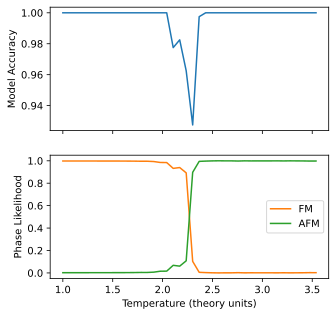

In [26]:
fig,ax = plt.subplots(2,1, sharex=True, figsize=(5,5))
acc_arr = np.array(accuracy)
# accuracy
# print(acc_arr[:,1])
ax[0].plot(temps,acc_arr[:,1], color=colors[0])
ax[0].set_ylabel('Model Accuracy')
ax[1].plot(temps,onehots[:,0], color=colors[1])
ax[1].plot(temps,onehots[:,1], color=colors[2])
ax[1].set_ylabel('Phase Likelihood')
ax[1].legend(['FM', 'AFM'], loc='best')
ax[1].set_xlabel('Temperature (theory units)');


<h2>Notes</h2>
More complex networks barely outperform a 2 neuron hidden layer DNN. This is as I expected, as really the "phase" is defined by how many of the spins are aligned. They also barely out perform a shallow NN, which may be because of the us of a single Markov chain without block updates to generate the data. Thus, it looks like the MC got stuck in a local minima (of this Mexican-hat like potential).